/tmp/ipykernel_178/112244219.py:8: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_file_path)
Initial Data Shape: (39717, 111)
Columns with Missing Values:
emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64
Number of duplicate rows: 0
Data cleaning completed. Cleaned data saved to: cleaned_data.csv
Final Data Shape: (39717, 54)


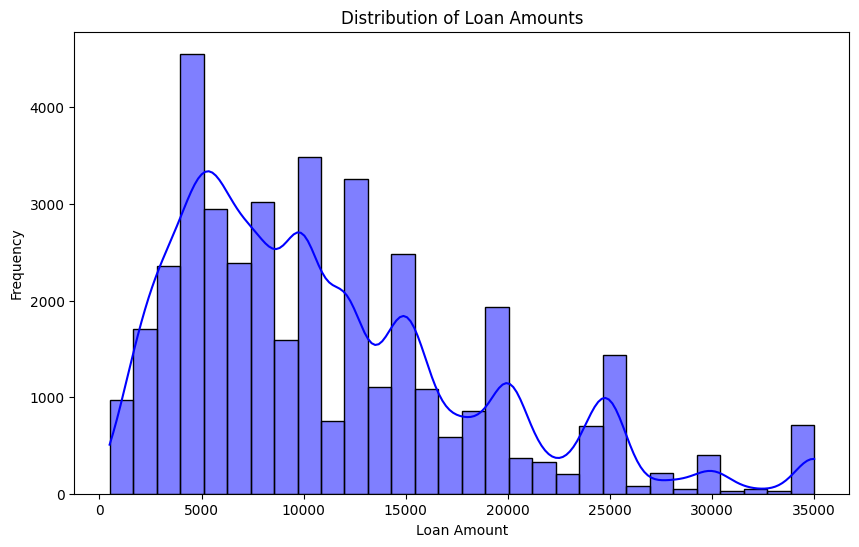

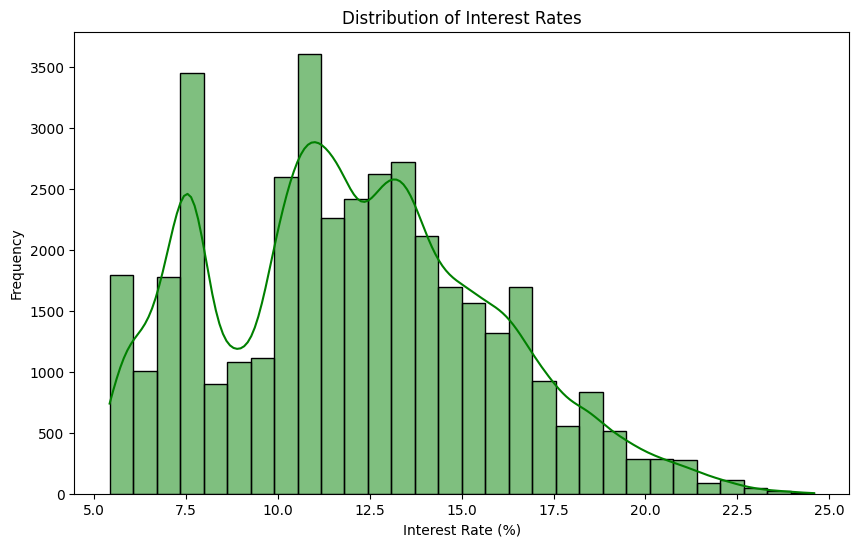

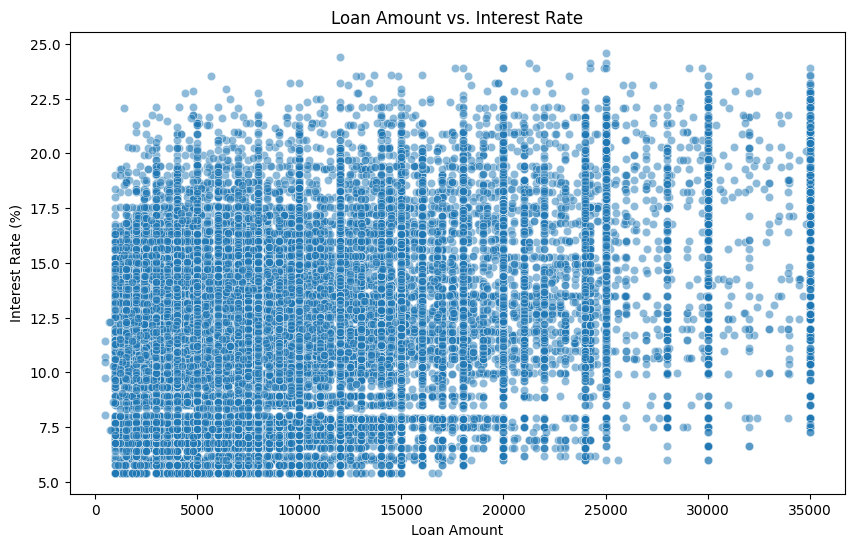

/tmp/ipykernel_178/112244219.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=data, palette='viridis', order=data['loan_status'].value_counts().index)


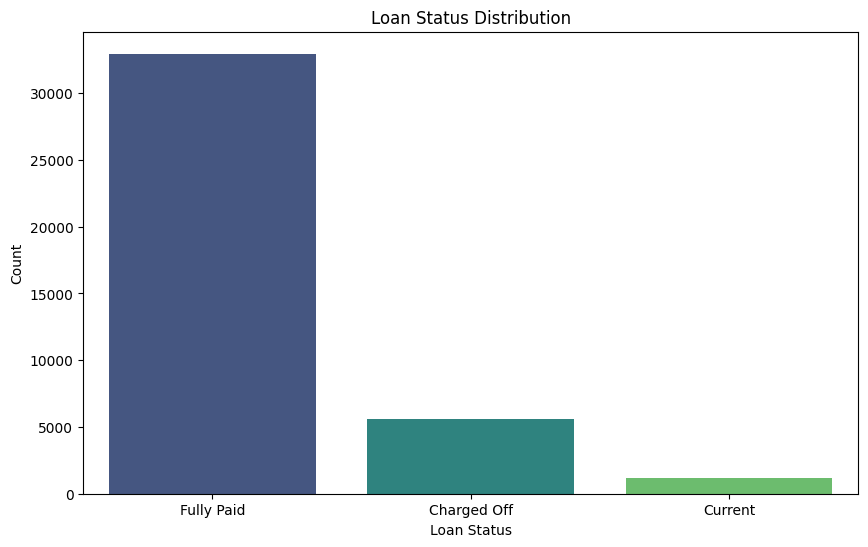

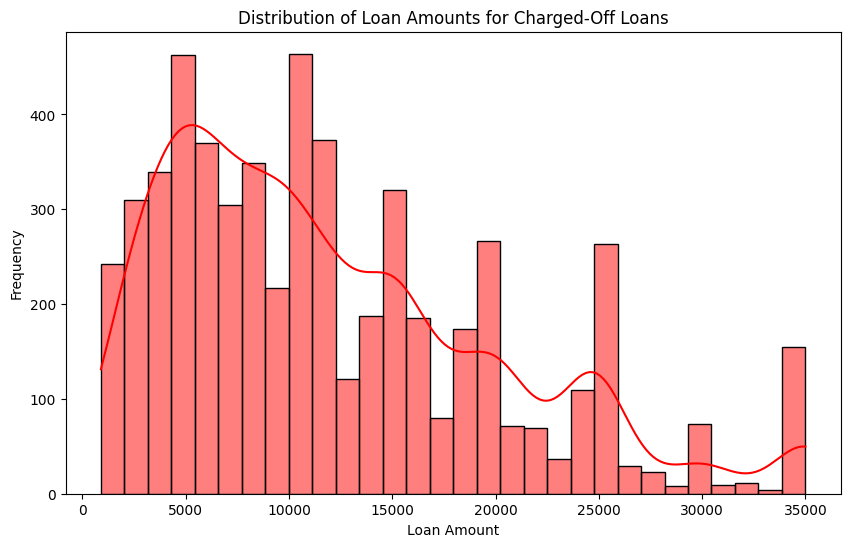

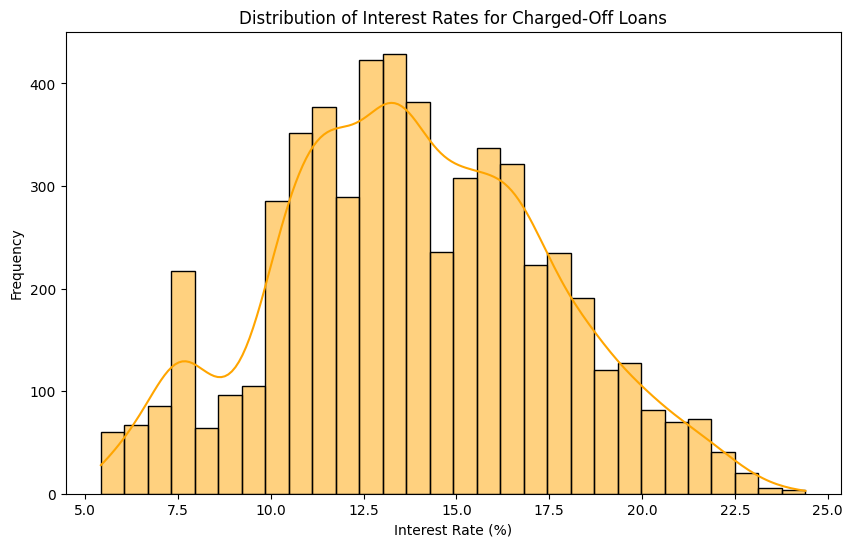

/tmp/ipykernel_178/112244219.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data=charged_off, palette='coolwarm', order=charged_off['grade'].value_counts().index)


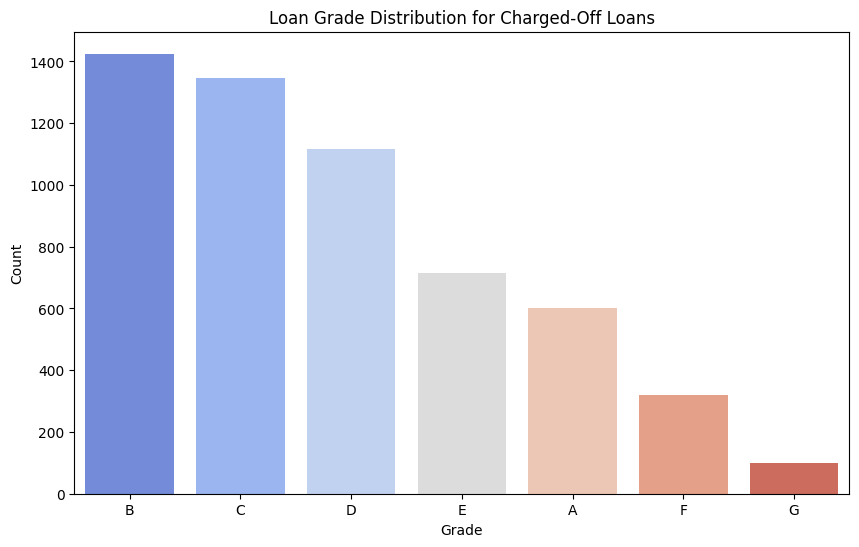

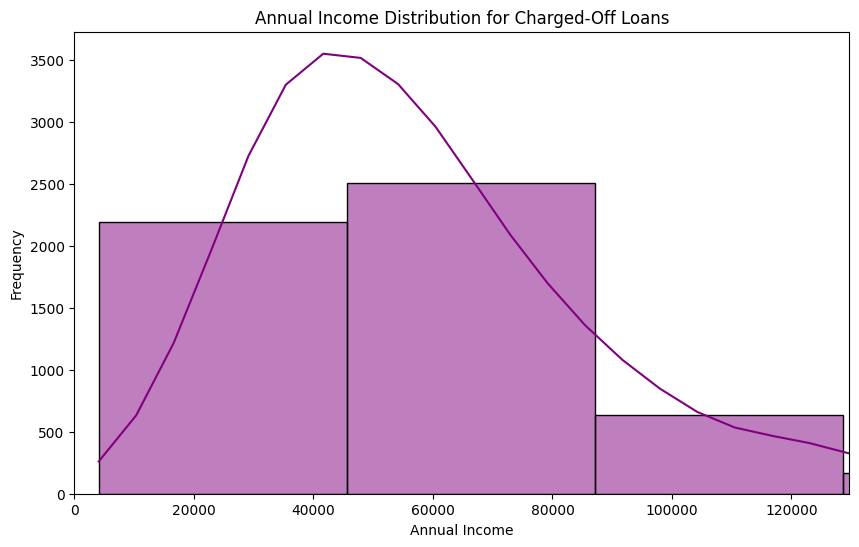

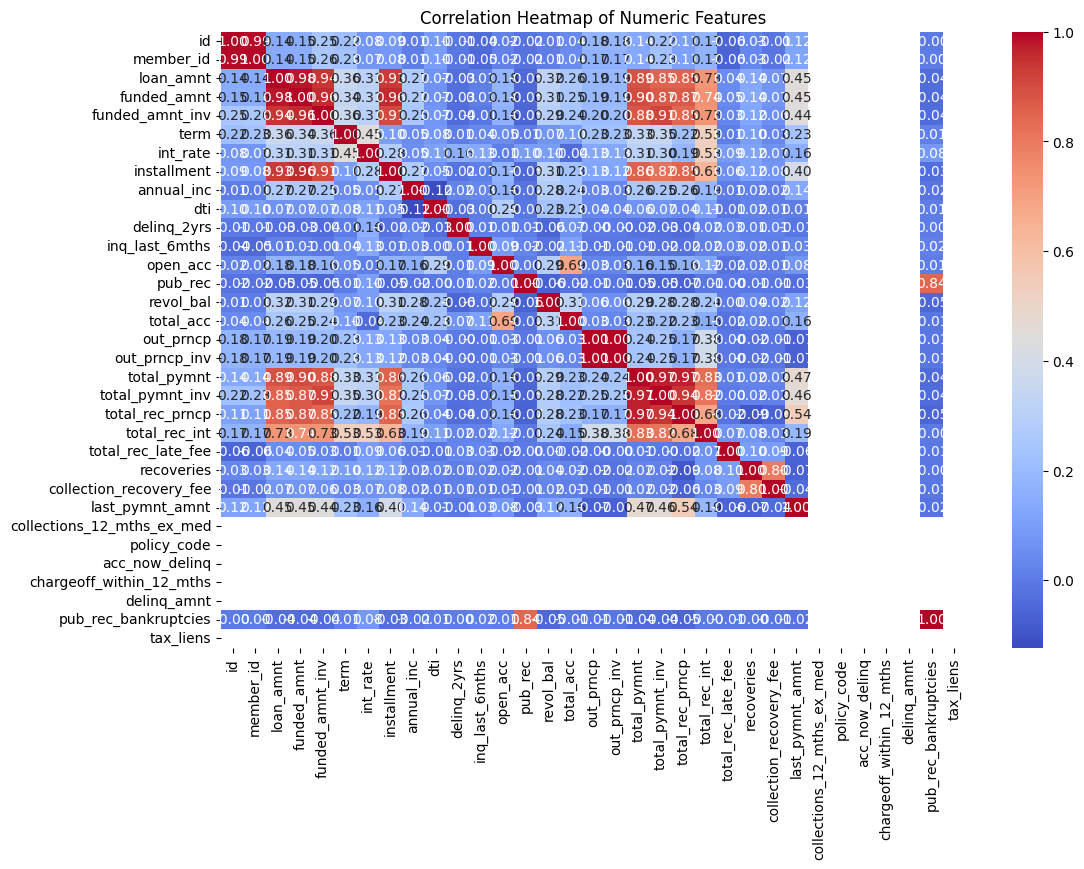

Key Insights from EDA:
1. Higher interest rates are associated with an increased likelihood of loan defaults.
2. Charged-off loans are more common in certain grades (e.g., D, E, F).
3. Annual income levels of defaulters tend to be skewed towards lower ranges.
4. Loan amount and interest rate show a positive correlation.
5. Correlation heatmap highlights potential relationships among numeric variables.
Data cleaning and EDA completed.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_file_path = 'Data.csv'
data = pd.read_csv(data_file_path)

# Step 1: Data Overview
print("Initial Data Shape:", data.shape)
print("Columns with Missing Values:")
print(data.isnull().sum()[data.isnull().sum() > 0])

# Step 2: Data Cleaning
# Convert interest rate to numeric
if 'int_rate' in data.columns:
    data['int_rate'] = data['int_rate'].str.replace('%', '').astype(float)

# Handle missing values
# Dropping columns with more than 50% missing values
missing_threshold = 0.5
data = data.loc[:, data.isnull().mean() < missing_threshold]

# Filling numeric missing values with median
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Filling categorical missing values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Step 3: Data Type Conversion
# Convert term to numeric (e.g., "36 months" -> 36)
if 'term' in data.columns:
    data['term'] = data['term'].str.extract(r'(\d+)').astype(float)

# Step 4: Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())
if data.duplicated().sum() > 0:
    data = data.drop_duplicates()

# Step 5: Save the cleaned data
cleaned_data_path = 'cleaned_data.csv'
data.to_csv(cleaned_data_path, index=False)

print("Data cleaning completed. Cleaned data saved to:", cleaned_data_path)
print("Final Data Shape:", data.shape)

# Load the cleaned dataset
data = pd.read_csv(cleaned_data_path)

# Step 6: Univariate Analysis
# Distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of interest rates
plt.figure(figsize=(10, 6))
sns.histplot(data['int_rate'], bins=30, kde=True, color='green')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Step 7: Bivariate Analysis
# Relationship between loan amount and interest rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=data, alpha=0.5)
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.show()

# Loan status counts
if 'loan_status' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='loan_status', data=data, palette='viridis', order=data['loan_status'].value_counts().index)
    plt.title('Loan Status Distribution')
    plt.xlabel('Loan Status')
    plt.ylabel('Count')
    plt.show()

# Step 8: Insights from EDA
# Analyze defaulters
if 'loan_status' in data.columns:
    charged_off = data[data['loan_status'] == 'Charged Off']

    # Loan amount distribution for charged-off loans
    plt.figure(figsize=(10, 6))
    sns.histplot(charged_off['loan_amnt'], bins=30, kde=True, color='red')
    plt.title('Distribution of Loan Amounts for Charged-Off Loans')
    plt.xlabel('Loan Amount')
    plt.ylabel('Frequency')
    plt.show()

    # Interest rate distribution for charged-off loans
    plt.figure(figsize=(10, 6))
    sns.histplot(charged_off['int_rate'], bins=30, kde=True, color='orange')
    plt.title('Distribution of Interest Rates for Charged-Off Loans')
    plt.xlabel('Interest Rate (%)')
    plt.ylabel('Frequency')
    plt.show()

    # Grade analysis for charged-off loans
    plt.figure(figsize=(10, 6))
    sns.countplot(x='grade', data=charged_off, palette='coolwarm', order=charged_off['grade'].value_counts().index)
    plt.title('Loan Grade Distribution for Charged-Off Loans')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.show()

    # Annual income distribution for charged-off loans
    if 'annual_inc' in charged_off.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(charged_off['annual_inc'], bins=30, kde=True, color='purple')
        plt.title('Annual Income Distribution for Charged-Off Loans')
        plt.xlabel('Annual Income')
        plt.ylabel('Frequency')
        plt.xlim(0, charged_off['annual_inc'].quantile(0.95))
        plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Summary of Insights
print("Key Insights from EDA:")
print("1. Higher interest rates are associated with an increased likelihood of loan defaults.")
print("2. Charged-off loans are more common in certain grades (e.g., D, E, F).")
print("3. Annual income levels of defaulters tend to be skewed towards lower ranges.")
print("4. Loan amount and interest rate show a positive correlation.")
print("5. Correlation heatmap highlights potential relationships among numeric variables.")

print("Data cleaning and EDA completed.")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b75fff08-af76-4d54-8836-3f9dff9631cc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>